##  *Import useful Liabraries*

In [2]:
# Import all liabraries that we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv("C:/Users/Admin/Downloads/heart.csv")
df.shape # (rows, columns)

(1025, 14)

In [4]:
df.head() #Display first 5 rows from file

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail() # Display last 5 rows from list

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
#  find out how many of each class there
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

## Data Visualization

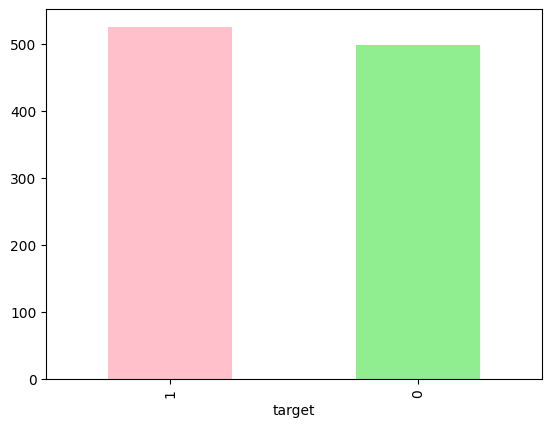

In [8]:
# Plot bar graph to check 0 and 1
df["target"].value_counts().plot(kind="bar", color=["pink", "lightgreen"]);

In [9]:
# Understand data in much details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


*we can see our tabular database consist int 64 and float 64 dtype, it needs to take in consideration while building our model.*

#### *Are there any missing values?*

In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Our database has no any null values

In [14]:
df.describe() # Check database in more detail

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [16]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


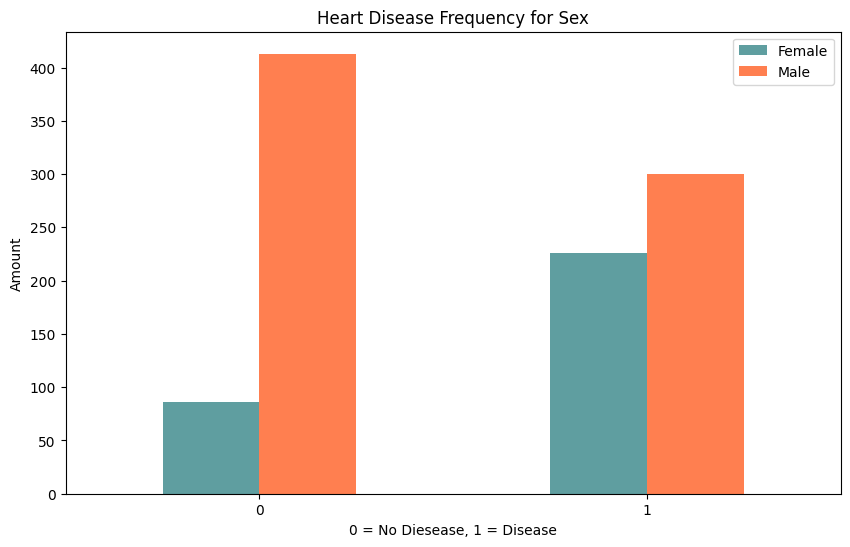

In [17]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["cadetblue", "coral"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


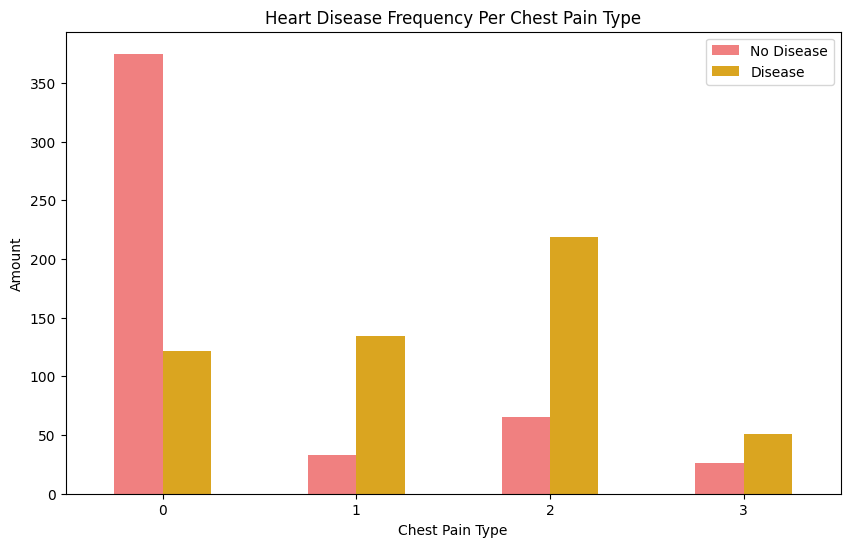

In [19]:
# Compare chestpain and amount
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["lightcoral", "goldenrod"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Implementation

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Change rows to 0's & 1's 

In [23]:
dataset = pd.get_dummies(data=df, columns = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal'], dtype=int) 

In [24]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
1021,60,125,258,141,2.8,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1022,47,110,275,118,1.0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
1023,50,110,254,159,0.0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


### Use StandardScalar for another rows

In [26]:
from sklearn.preprocessing import StandardScaler

std_sclr = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = std_sclr.fit_transform(dataset[columns_to_scale])

In [27]:
dataset.dtypes

age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
target         int64
sex_0          int32
sex_1          int32
cp_0           int32
cp_1           int32
cp_2           int32
cp_3           int32
fbs_0          int32
fbs_1          int32
restecg_0      int32
restecg_1      int32
restecg_2      int32
exang_0        int32
exang_1        int32
slope_0        int32
slope_1        int32
slope_2        int32
ca_0           int32
ca_1           int32
ca_2           int32
ca_3           int32
ca_4           int32
thal_0         int32
thal_1         int32
thal_2         int32
thal_3         int32
dtype: object

In [28]:
feature = df.drop("target", axis=1) # drop target 
feature_label = df['target']

In [29]:
Train = feature.sample(frac=0.7, random_state = 10)
TrainLabel = feature_label[Train.index]
Test = feature.drop(Train.index)
TestLabel = feature_label.drop(Train.index)

In [30]:
print(Train.shape)
print(TrainLabel.shape)
print(Test.shape)
print(TestLabel.shape)

(718, 13)
(718,)
(307, 13)
(307,)


In [31]:
type(Train)

pandas.core.frame.DataFrame

In [32]:
train = Train.to_numpy()

In [33]:
type(train)

numpy.ndarray

## Implementing Sequential Model  

In [35]:
#from tensorflow.keras.layers import Input, Dense
Model_1 = keras.Sequential()
Model_1.add(keras.Input(shape=(13,)))
Model_1.add(keras.layers.Dense(13, activation='relu'))
Model_1.add(keras.layers.Dense(1, activation='sigmoid'))

Model_1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_1 = Model_1.fit(train, TrainLabel, validation_split=0.2, epochs=20) 

Epoch 1/20
18/18 [==============================] - 1s 20ms/step - loss: 23.7627 - accuracy: 0.5000 - val_loss: 14.1857 - val_accuracy: 0.5278
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 7.5888 - accuracy: 0.4791 - val_loss: 1.7333 - val_accuracy: 0.4097
Epoch 3/20
18/18 [==============================] - 0s 4ms/step - loss: 2.2616 - accuracy: 0.4686 - val_loss: 1.4438 - val_accuracy: 0.4167
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 1.3237 - accuracy: 0.4564 - val_loss: 1.1389 - val_accuracy: 0.5069
Epoch 5/20
18/18 [==============================] - 0s 4ms/step - loss: 0.9976 - accuracy: 0.5279 - val_loss: 0.8991 - val_accuracy: 0.5625
Epoch 6/20
18/18 [==============================] - 0s 3ms/step - loss: 0.8659 - accuracy: 0.5662 - val_loss: 0.7733 - val_accuracy: 0.5972
Epoch 7/20
18/18 [==============================] - 0s 3ms/step - loss: 0.7517 - accuracy: 0.5976 - val_loss: 0.7046 - val_accuracy: 0.6528
Epoch 8/20
18/18 

In [36]:
# Check the results of the model_1 to whole test dataset
Model_1.evaluate(Test, TestLabel)

10/10 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.7036


[0.5961659550666809, 0.7035830616950989]

In [37]:
# define plot loss curves

def plot_loss_curves(history): # Plot Loss and Accuracy Curves 
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

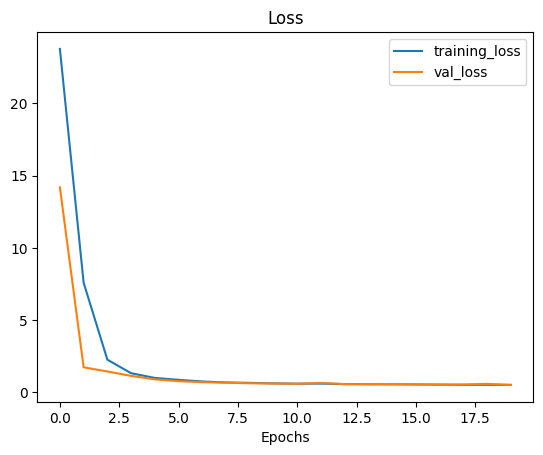

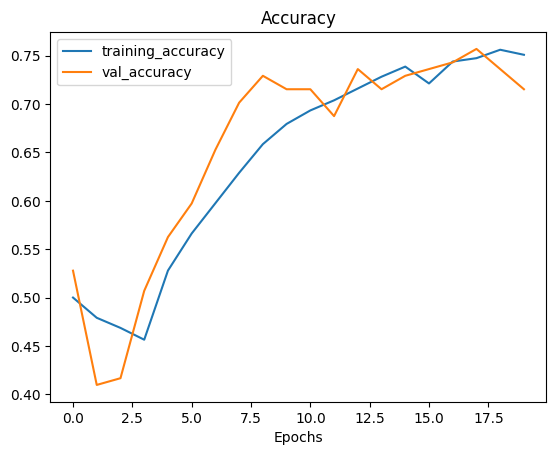

In [38]:
plot_loss_curves(Hist_1)

#### Model_1 has not perform well so need to improve our model more to get more accuracy and less loss

In [40]:
# Set random seed
tf.random.set_seed(42)

Model_2 = keras.Sequential()       # add more 2 dense layers and 10 more epochs 
Model_2.add(keras.Input(shape=(13,)))
Model_2.add(keras.layers.Dense(13, activation='relu'))
Model_2.add(keras.layers.Dense(13, activation='relu')) 
Model_2.add(keras.layers.Dense(13, activation='relu')) 
Model_2.add(keras.layers.Dense(1, activation='sigmoid'))

Model_2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_2 = Model_2.fit(Train, TrainLabel, validation_split=0.2, epochs=30)

Epoch 1/30
18/18 [==============================] - 1s 21ms/step - loss: 27.3760 - accuracy: 0.5000 - val_loss: 18.1047 - val_accuracy: 0.5278
Epoch 2/30
18/18 [==============================] - 0s 4ms/step - loss: 12.8940 - accuracy: 0.5000 - val_loss: 6.2793 - val_accuracy: 0.5278
Epoch 3/30
18/18 [==============================] - 0s 4ms/step - loss: 2.7487 - accuracy: 0.5261 - val_loss: 1.1039 - val_accuracy: 0.4861
Epoch 4/30
18/18 [==============================] - 0s 4ms/step - loss: 0.9202 - accuracy: 0.5645 - val_loss: 0.6876 - val_accuracy: 0.5625
Epoch 5/30
18/18 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.6429 - val_loss: 0.5694 - val_accuracy: 0.7222
Epoch 6/30
18/18 [==============================] - 0s 4ms/step - loss: 0.6079 - accuracy: 0.6847 - val_loss: 0.5393 - val_accuracy: 0.7708
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.6916 - val_loss: 0.5303 - val_accuracy: 0.7986
Epoch 8/30
18/18

In [41]:
# Check the results of the model_2 to whole test dataset
Model_2.evaluate(Test, TestLabel)

10/10 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.6808


[0.5999798774719238, 0.6807817816734314]

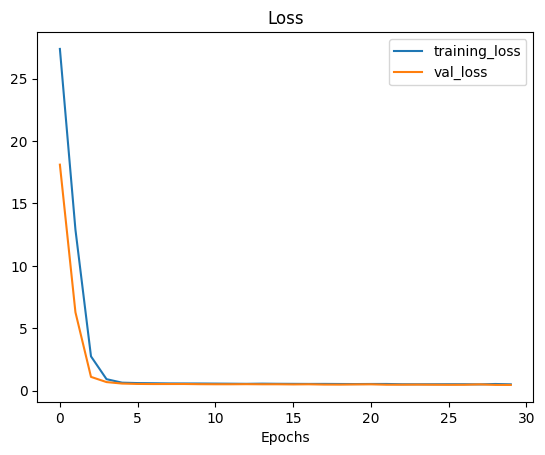

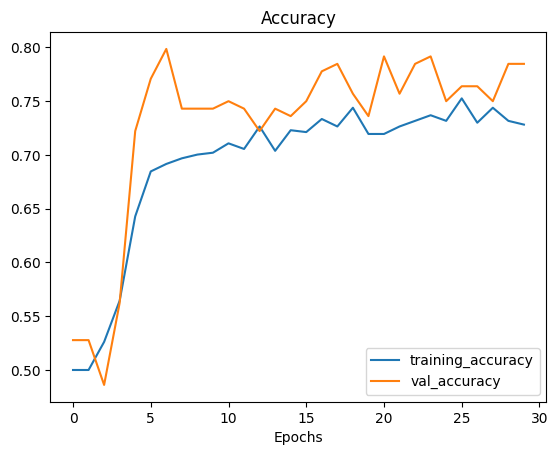

In [42]:
plot_loss_curves(Hist_2)

#### Now again Model_2 has not perform well so need to improve our model more 

In [44]:
# Set random seed
tf.random.set_seed(42)

import tensorflow.keras as keras
Model_3 = keras.Sequential()       # add 1 more dense layers and 10 more epochs
Model_3.add(keras.Input(shape=(13,)))
Model_3.add(keras.layers.Dense(13, activation='relu'))
Model_3.add(keras.layers.Dense(13, activation='relu'))
Model_3.add(keras.layers.Dense(13, activation='relu'))
Model_3.add(keras.layers.Dense(13, activation='relu'))
Model_3.add(keras.layers.Dense(1, activation='sigmoid'))

Model_3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_3 = Model_3.fit(Train, TrainLabel, validation_split=0.2, epochs=40)

Epoch 1/40
18/18 [==============================] - 1s 18ms/step - loss: 3.6795 - accuracy: 0.5209 - val_loss: 1.5711 - val_accuracy: 0.4722
Epoch 2/40
18/18 [==============================] - 0s 4ms/step - loss: 1.1279 - accuracy: 0.4530 - val_loss: 0.7566 - val_accuracy: 0.5278
Epoch 3/40
18/18 [==============================] - 0s 4ms/step - loss: 0.7082 - accuracy: 0.5348 - val_loss: 0.6298 - val_accuracy: 0.6042
Epoch 4/40
18/18 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.6429 - val_loss: 0.5895 - val_accuracy: 0.6597
Epoch 5/40
18/18 [==============================] - 0s 4ms/step - loss: 0.6109 - accuracy: 0.6655 - val_loss: 0.5915 - val_accuracy: 0.6875
Epoch 6/40
18/18 [==============================] - 0s 4ms/step - loss: 0.6040 - accuracy: 0.6620 - val_loss: 0.5899 - val_accuracy: 0.6736
Epoch 7/40
18/18 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.6777 - val_loss: 0.5888 - val_accuracy: 0.6806
Epoch 8/40
18/18 [=

In [45]:
# Check the results of the model_3 to whole test dataset
Model_3.evaluate(Test, TestLabel)

10/10 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.6840


[0.5869055390357971, 0.6840391159057617]

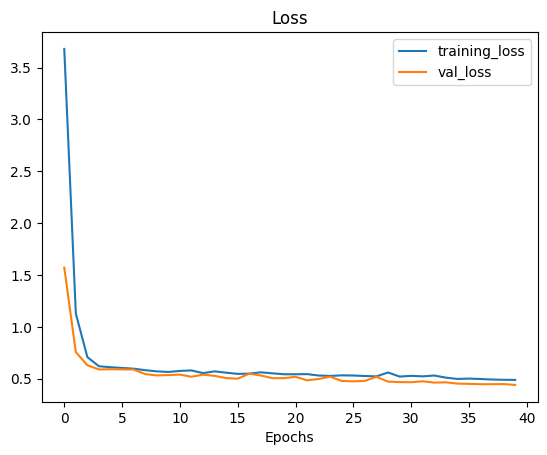

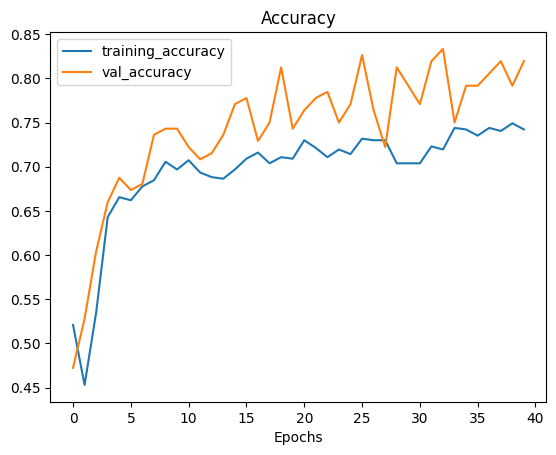

In [46]:
plot_loss_curves(Hist_3)

 Model_3 Also not perform well need to improve more

In [48]:
# Set random seed
tf.random.set_seed(42)

import tensorflow.keras as keras
Model_4 = keras.Sequential()     # add 1 more dense layers and 10 more epochs
Model_4.add(keras.Input(shape=(13,)))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(13, activation='relu'))
Model_4.add(keras.layers.Dense(1, activation='sigmoid'))

Model_4.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_4 = Model_4.fit(Train, TrainLabel, validation_split=0.2, epochs=50)

Epoch 1/50
18/18 [==============================] - 1s 19ms/step - loss: 2.4483 - accuracy: 0.5679 - val_loss: 1.1575 - val_accuracy: 0.5278
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.9300 - accuracy: 0.5523 - val_loss: 0.8159 - val_accuracy: 0.5694
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.8401 - accuracy: 0.6202 - val_loss: 0.6990 - val_accuracy: 0.6875
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.6551 - val_loss: 0.5860 - val_accuracy: 0.7083
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6156 - accuracy: 0.6638 - val_loss: 0.5765 - val_accuracy: 0.7083
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6125 - accuracy: 0.6672 - val_loss: 0.5533 - val_accuracy: 0.7153
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.6951 - val_loss: 0.5473 - val_accuracy: 0.7292
Epoch 8/50
18/18 [=

In [49]:
# Check the results of the model_4 to whole test dataset
Model_4.evaluate(Test, TestLabel)

10/10 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7720


[0.504725992679596, 0.7719869613647461]

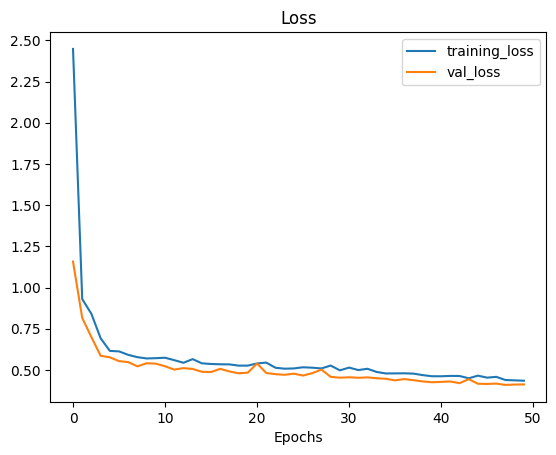

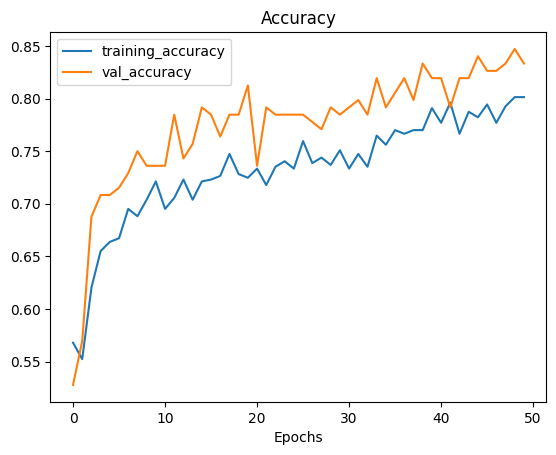

In [50]:
plot_loss_curves(Hist_4)

Need to improve our model more. 

In [52]:
# Set random seed
tf.random.set_seed(42)

import tensorflow.keras as keras
Model_5 = keras.Sequential()     # add 1 more dense layers and epochs to 200
Model_5.add(keras.Input(shape=(13,)))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(13, activation='relu'))
Model_5.add(keras.layers.Dense(1, activation='sigmoid'))

Model_5.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_5 = Model_5.fit(Train, TrainLabel, validation_split=0.2, epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 38ms/step - loss: 2.5732 - accuracy: 0.5836 - val_loss: 1.0511 - val_accuracy: 0.5278
Epoch 2/200
18/18 [==============================] - 0s 8ms/step - loss: 0.7993 - accuracy: 0.5767 - val_loss: 0.6003 - val_accuracy: 0.6389
Epoch 3/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6120 - accuracy: 0.6429 - val_loss: 0.5571 - val_accuracy: 0.7222
Epoch 4/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5844 - accuracy: 0.6638 - val_loss: 0.5511 - val_accuracy: 0.7292
Epoch 5/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5807 - accuracy: 0.6707 - val_loss: 0.5496 - val_accuracy: 0.7431
Epoch 6/200
18/18 [==============================] - 0s 8ms/step - loss: 0.5772 - accuracy: 0.6463 - val_loss: 0.5560 - val_accuracy: 0.7361
Epoch 7/200
18/18 [==============================] - 0s 7ms/step - loss: 0.5822 - accuracy: 0.6725 - val_loss: 0.5474 - val_accuracy: 0.7361
Epoch 8/200


6/6 [==============================] - 0s 6ms/step - loss: 0.3979 - accuracy: 0.8166 - val_loss: 0.3344 - val_accuracy: 0.8605
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4190 - accuracy: 0.7988 - val_loss: 0.4751 - val_accuracy: 0.7674
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3682 - accuracy: 0.8284 - val_loss: 0.4045 - val_accuracy: 0.8605
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.8343 - val_loss: 0.5482 - val_accuracy: 0.6977
Epoch 179/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.8462 - val_loss: 0.3626 - val_accuracy: 0.9070
Epoch 180/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3679 - accuracy: 0.8462 - val_loss: 0.4184 - val_accuracy: 0.7907
Epoch 181/200
6/6 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.8521 - val_loss: 0.3986 - val_accuracy: 0.8605
Epoch 182/200
6/6 [========

In [53]:
# Check the results of the model_5 to whole test dataset
Model_5.evaluate(Test, TestLabel)

10/10 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8371


[0.3824138939380646, 0.837133526802063]

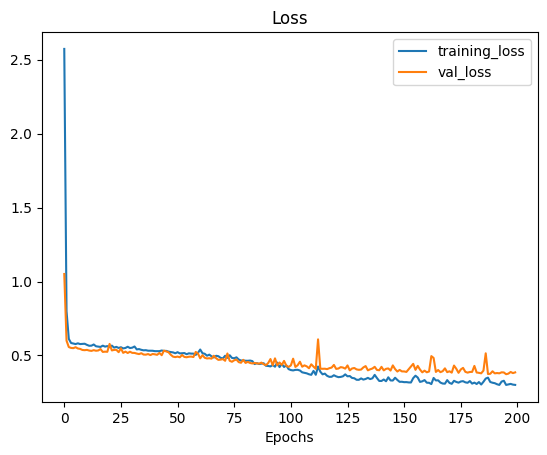

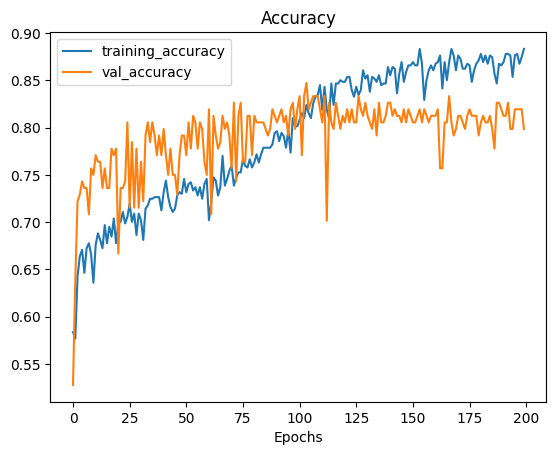

In [54]:
plot_loss_curves(Hist_5)

In [55]:
# Set random seed
tf.random.set_seed(42)

#from tensorflow.keras.layers import Input, Dense
import tensorflow.keras as keras
Model_6 = keras.Sequential()     # add 1 more dense layers and epochs to 150
Model_6.add(keras.Input(shape=(13,)))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(13, activation='relu'))
Model_6.add(keras.layers.Dense(1, activation='sigmoid'))

Model_6.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_6 = Model_6.fit(Train, TrainLabel, validation_split=0.2, epochs=150)

Epoch 1/150
18/18 [==============================] - 1s 20ms/step - loss: 1.6276 - accuracy: 0.5000 - val_loss: 0.7468 - val_accuracy: 0.4722
Epoch 2/150
18/18 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5383 - val_loss: 0.6086 - val_accuracy: 0.6806
Epoch 3/150
18/18 [==============================] - 0s 6ms/step - loss: 0.6359 - accuracy: 0.6620 - val_loss: 0.5909 - val_accuracy: 0.6875
Epoch 4/150
18/18 [==============================] - 0s 8ms/step - loss: 0.6079 - accuracy: 0.6672 - val_loss: 0.5669 - val_accuracy: 0.7500
Epoch 5/150
18/18 [==============================] - 0s 7ms/step - loss: 0.5948 - accuracy: 0.6742 - val_loss: 0.5461 - val_accuracy: 0.7500
Epoch 6/150
18/18 [==============================] - 0s 8ms/step - loss: 0.5815 - accuracy: 0.6777 - val_loss: 0.5542 - val_accuracy: 0.7083
Epoch 7/150
18/18 [==============================] - 0s 8ms/step - loss: 0.5860 - accuracy: 0.6829 - val_loss: 0.5416 - val_accuracy: 0.7083
Epoch 8/150


In [56]:
# Check the results of the model_6 to whole test dataset
Model_6.evaluate(Test, TestLabel)

10/10 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.8241


[0.39717328548431396, 0.8241042494773865]

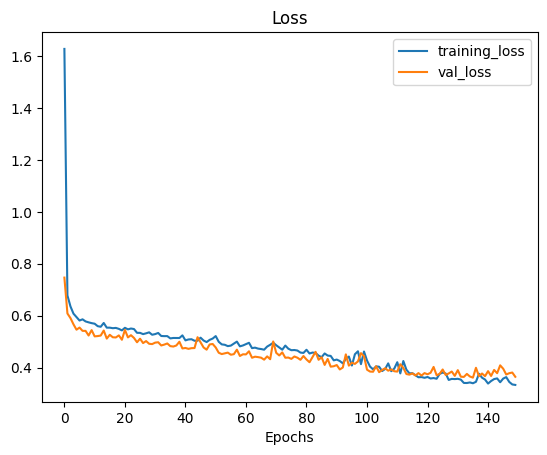

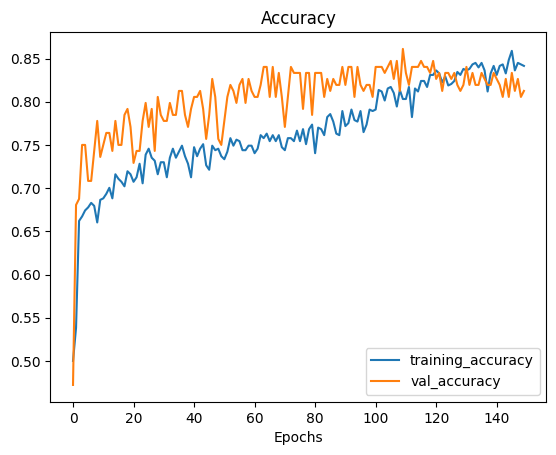

In [57]:
plot_loss_curves(Hist_6)

In [58]:
# Set random seed
tf.random.set_seed(42)

#from tensorflow.keras.layers import Input, Dense
import tensorflow.keras as keras
Model_7 = keras.Sequential()      # add 2 more dense layers and epochs to 200
Model_7.add(keras.Input(shape=(13,)))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(13, activation='relu'))
Model_7.add(keras.layers.Dense(1, activation='sigmoid'))

Model_7.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

Hist_7 = Model_7.fit(Train, TrainLabel, validation_split=0.2, epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 36ms/step - loss: 0.8546 - accuracy: 0.5000 - val_loss: 0.6882 - val_accuracy: 0.4722
Epoch 2/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6666 - accuracy: 0.5035 - val_loss: 0.6628 - val_accuracy: 0.4861
Epoch 3/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6630 - accuracy: 0.5279 - val_loss: 0.6271 - val_accuracy: 0.6806
Epoch 4/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6602 - accuracy: 0.5889 - val_loss: 0.6220 - val_accuracy: 0.6806
Epoch 5/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6483 - accuracy: 0.6115 - val_loss: 0.6024 - val_accuracy: 0.7500
Epoch 6/200
18/18 [==============================] - 0s 10ms/step - loss: 0.6198 - accuracy: 0.6951 - val_loss: 0.5796 - val_accuracy: 0.7361
Epoch 7/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6084 - accuracy: 0.6777 - val_loss: 0.5726 - val_accuracy: 0.7431
Epoch 8/200

6/6 [==============================] - 0s 6ms/step - loss: 0.4492 - accuracy: 0.7929 - val_loss: 0.4151 - val_accuracy: 0.7674
Epoch 176/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.7751 - val_loss: 0.6205 - val_accuracy: 0.6977
Epoch 177/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4480 - accuracy: 0.7751 - val_loss: 0.3982 - val_accuracy: 0.7674
Epoch 178/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4585 - accuracy: 0.7811 - val_loss: 0.5842 - val_accuracy: 0.6977
Epoch 179/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.7988 - val_loss: 0.4570 - val_accuracy: 0.7674
Epoch 180/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4516 - accuracy: 0.8166 - val_loss: 0.5126 - val_accuracy: 0.7209
Epoch 181/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4375 - accuracy: 0.7988 - val_loss: 0.4596 - val_accuracy: 0.7442
Epoch 182/200
6/6 [========

In [59]:
# Check the results of the model_7 to whole test dataset
Model_7.evaluate(Test, TestLabel)

10/10 [==============================] - 0s 2ms/step - loss: 0.5252 - accuracy: 0.8502


[0.5251917243003845, 0.8501628637313843]

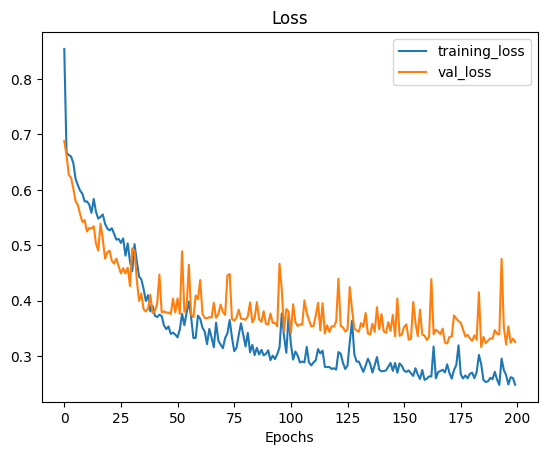

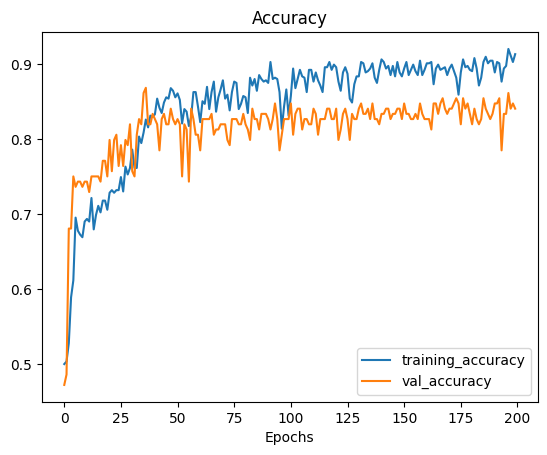

In [60]:
plot_loss_curves(Hist_7)

#### Model 7 performs well compare to other models 


In [62]:
Model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 13)                182       
                                                                 
 dense_33 (Dense)            (None, 13)                182       
                                                                 
 dense_34 (Dense)            (None, 13)                182       
                                                                 
 dense_35 (Dense)            (None, 13)                182       
                                                                 
 dense_36 (Dense)            (None, 13)                182       
                                                                 
 dense_37 (Dense)            (None, 13)                182       
                                                                 
 dense_38 (Dense)            (None, 13)               

### Prediction on Test DataSet

In [64]:
Preds = Model_7.predict(Test)
Preds = Preds.flatten()
Preds[:3]

10/10 [==============================] - 0s 2ms/step


array([0.05544421, 0.01859399, 0.799613  ], dtype=float32)

In [65]:
PredsLabels = []
for element in Preds:
    PredsLabels.append(int(round(element)))
PredsLabelsA = np.array(PredsLabels)

In [66]:
print(PredsLabelsA[:10])
print(TestLabel[:10])

[0 0 1 0 0 0 1 1 0 1]
0     0
4     0
5     1
8     0
9     0
13    0
15    1
18    1
32    0
40    1
Name: target, dtype: int64


#### Classification Report

In [68]:
print(classification_report(TestLabel, PredsLabelsA)) 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       144
           1       0.87      0.84      0.86       163

    accuracy                           0.85       307
   macro avg       0.85      0.85      0.85       307
weighted avg       0.85      0.85      0.85       307



####  Confusion Matrix

Text(50.722222222222214, 0.5, 'Truth')

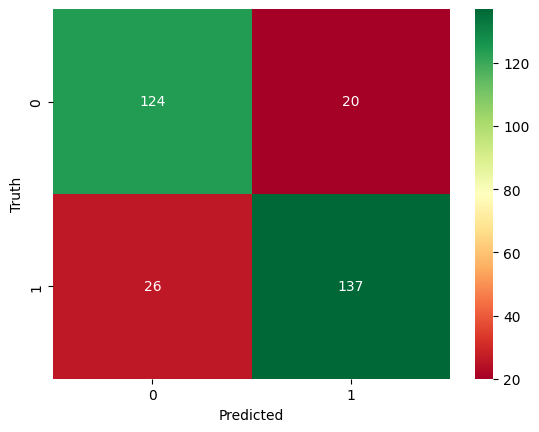

In [70]:
import tensorflow as tf
import seaborn as sn
n_conf_mat = tf.math.confusion_matrix(labels=TestLabel, predictions=PredsLabelsA)

sn.heatmap(n_conf_mat, annot=True, cmap='RdYlGn', fmt='d') #YlOrBr
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [141]:
model_path = 'E:/Deployment/Model_4.h5'
Model_4.save(model_path)  # This will save the model as a single .h5 file
print(f"Model saved to: {model_path}")

Model saved to: E:/Deployment/Model_4.h5


In [143]:
# Load the model
loaded_model = tf.keras.models.load_model(model_path)

print("Model loaded successfully")

Model loaded successfully


In [145]:
predictions = loaded_model.predict(Test)
print(predictions)

10/10 [==============================] - 0s 2ms/step
[[0.6964037 ]
 [0.05699181]
 [0.6864014 ]
 [0.4047654 ]
 [0.04748103]
 [0.01103237]
 [0.99910617]
 [0.8694724 ]
 [0.4937909 ]
 [0.24745367]
 [0.70253193]
 [0.8247976 ]
 [0.8157106 ]
 [0.4847044 ]
 [0.49500743]
 [0.28629172]
 [0.2807056 ]
 [0.11934878]
 [0.11934878]
 [0.4591849 ]
 [0.04426567]
 [0.34021583]
 [0.56789666]
 [0.11895338]
 [0.15892349]
 [0.7288555 ]
 [0.32750553]
 [0.91571116]
 [0.20519096]
 [0.9215315 ]
 [0.5423847 ]
 [0.4515284 ]
 [0.69421804]
 [0.26367575]
 [0.04275396]
 [0.6595548 ]
 [0.8283085 ]
 [0.56091654]
 [0.86656535]
 [0.09278946]
 [0.15492252]
 [0.79023373]
 [0.26440683]
 [0.15144356]
 [0.9510928 ]
 [0.9919657 ]
 [0.5324065 ]
 [0.15892349]
 [0.2653205 ]
 [0.02446198]
 [0.26440683]
 [0.2907805 ]
 [0.9122727 ]
 [0.99373263]
 [0.49500743]
 [0.4944055 ]
 [0.22887143]
 [0.5324065 ]
 [0.15950935]
 [0.23991379]
 [0.11758334]
 [0.7820808 ]
 [0.45088288]
 [0.60140425]
 [0.33105546]
 [0.01717792]
 [0.5672468 ]
 [0.97788

NameError: name 'features' is not defined